In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils import *
from scipy.special import binom

In [2]:
P = pickle.load(open('WLSSurface', 'rb'))

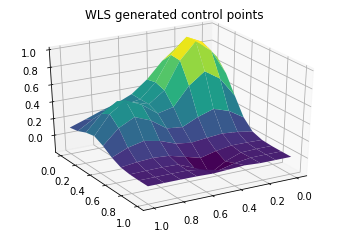

In [3]:
fig = plt.figure()

X = np.linspace(0, 1, 10)
Y = np.linspace(0, 1, 10)
X, Y = np.meshgrid(X, Y)

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_title("WLS generated control points")
Z = P

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.view_init(30, 60)
plt.show()

In [4]:
def B(n, i, u):
    return binom(n, i) * u**i * (1-u)**(n-i)


def DeCasteljauSubdivide(P, u):
    n = P.shape[0]
    Q = np.zeros((n, n))
    
    for i in range(n):
        Q[0][i] = P[i]
        
    for k in range(1, n):
        for i in range(n-k):
            Q[k][i] = (1-u) * Q[k-1][i] + u * Q[k-1][i+1]
    
    A = [Q[k][0] for k in range(n-1)]
    B = [Q[n-1-k][k] for k in range(n)]
    C = np.concatenate((A,B))

    return C

def DeCasteljauSubdivideSurface(P,u,v):
    # New subdivided control polygon
    n, m = P.shape
    
    Q = np.zeros((n*2-1, m*2-1))
    S = np.zeros((n, m*2-1))
    for i in range(n):
        S[i] = DeCasteljauSubdivide(P[i], v)
    for j in range(m*2-1):
        Q[j] = DeCasteljauSubdivide(S[:,j], u)
    
    return Q.T

class BezierSurface:
    
    def __init__(self, P, k=1):
        self.P = P
        self.S = P
        self.n = P.shape[0]
        self.m = P.shape[1]
        self.k = k
        
    def subdivide(self, k):
        self.k = k
        S = self.P
        for i in range(k-1):
            S = DeCasteljauSubdivideSurface(S, 0.5, 0.5)
        self.S = S
    
    def f(self, u,v):
        #Bu = np.array([B(self.m, i, u) for i in range(self.m)])#[:, np.newaxis]
        #Bv = np.array([B(self.n, j, v) for j in range(self.n)])#[:, np.newaxis]
        
        m,n = self.S.shape
        
        return sum([self.S[j][i] * B(m, i, u) * B(n, j, v) for j in range(n) for i in range(m)])
                

In [5]:
surface = BezierSurface(P)
#surface.f(0,0)

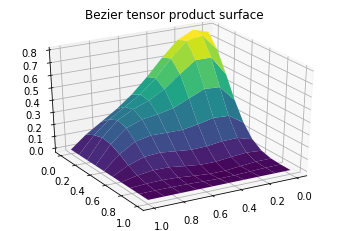

In [6]:
fig = plt.figure()

X2 = np.linspace(0, 1, 10)
Y2 = np.linspace(0, 1, 10)
X2, Y2 = np.meshgrid(X2, Y2)

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_title("Bezier tensor product surface")
Z2 = surface.f(X2,Y2)

# Plot the surface.
ax.plot_surface(X2, Y2, Z2, cmap='viridis')
#ax.plot_wireframe(X,Y,Z, alpha=0.8, color='red', label='Control polygon')
#ax.legend()
ax.view_init(30, 60)
plt.show()

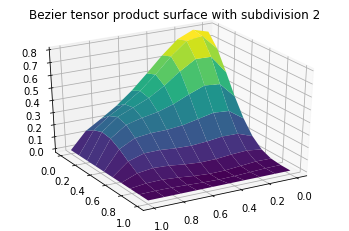

In [7]:
fig = plt.figure()
k = 2
surface.subdivide(k)

X3 = np.linspace(0, 1, 10)
Y3 = np.linspace(0, 1, 10)
X3, Y3 = np.meshgrid(X3, Y3)

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_title(f"Bezier tensor product surface with subdivision {k}")
Z3 = surface.f(X3,Y3)

# Plot the surface.
ax.plot_surface(X3, Y3, Z3, cmap='viridis')
#ax.plot_wireframe(X,Y,Z, alpha=0.8, color='red', label='Control polygon')
#ax.legend()
ax.view_init(30, 60)
plt.show()

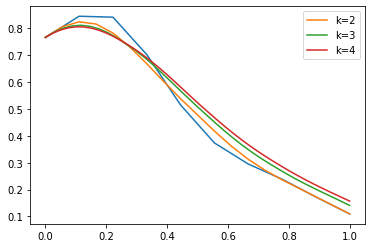

In [29]:
X = P[0]
Y = np.linspace(0, 1, X.shape[0])
plt.plot(Y,X)

X = DeCasteljauSubdivide(X, 0.5)
Y = np.linspace(0, 1, X.shape[0])

plt.plot(Y, X, label="k=2")

for i in range(2):
    # Halve it 
    middle = X.shape[0]//2
    H = X[0:middle+1]
    H2 = X[middle:-1]
    X2 = DeCasteljauSubdivide(H, 0.5)
    X3 = DeCasteljauSubdivide(H2, 0.5)[1:]
    X = np.concatenate((X2,X3))
    Y = np.linspace(0, 1, X.shape[0])
    plt.plot(Y, X, label=f'k={i+3}')

plt.legend()
plt.show()